In [1]:
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df=pd.read_csv('avocado_dataset.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


EDA

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

we can observe all columns are float in nature except date,region and type 

In [5]:
df.shape

(18249, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

the 'Unnamed:0'column is numbered like index which is not related for analysis hence we will drop the column

In [7]:
df.drop('Unnamed: 0',inplace=True,axis=1)

UNDERSTANDING THE COLUMNS

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

we dont have any null or NaN values in the dataset

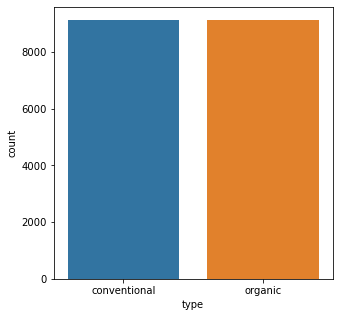

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(df.type)

In [11]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

their is 2 category in type column conventional and organic which looks like equally distributed while plotting,but when we derive numerical results conventionaltype of avacados slightly high in number

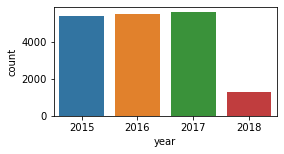

In [115]:
plt.figure(figsize=(4,2))
sns.countplot(df.year)

In [13]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

The data has been collected from 2015,2016,2017 & 2018, information is not evenly extracted from all years,we can see 2017 has highest and 2018 with least data

In [14]:
df.region.value_counts()

Seattle                338
Detroit                338
SouthCentral           338
California             338
Indianapolis           338
Northeast              338
GrandRapids            338
DallasFtWorth          338
Atlanta                338
BuffaloRochester       338
MiamiFtLauderdale      338
TotalUS                338
Albany                 338
Tampa                  338
Louisville             338
HartfordSpringfield    338
NewYork                338
Spokane                338
Roanoke                338
Houston                338
Midsouth               338
Columbus               338
CincinnatiDayton       338
Pittsburgh             338
Philadelphia           338
BaltimoreWashington    338
LosAngeles             338
Southeast              338
NorthernNewEngland     338
SanDiego               338
PhoenixTucson          338
NewOrleansMobile       338
Nashville              338
LasVegas               338
StLouis                338
Boston                 338
Chicago                338
S

we have got 54 varities of regions from which data is taken

In [15]:

df.groupby('year')['type'].value_counts()


year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

we can observe 2016 and 2018 the conventional amd organic avacados sold equal numbers and in 2015 and 2017 conventional types was sold at insignificantly high volume

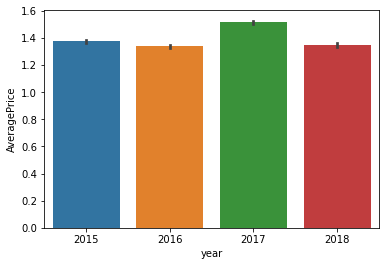

In [16]:
sns.barplot(x='year',y='AveragePrice',data=df)

From the above barplot we can understand the average price was high in the year 2017 and lowest in 2016

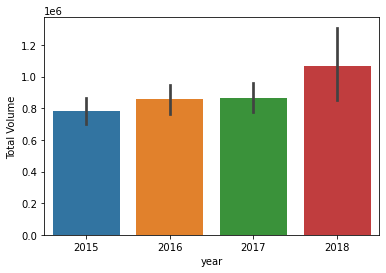

In [17]:
sns.barplot(x='year',y='Total Volume',data=df)

Volume of sales is high in 2018 and lowest in 2015

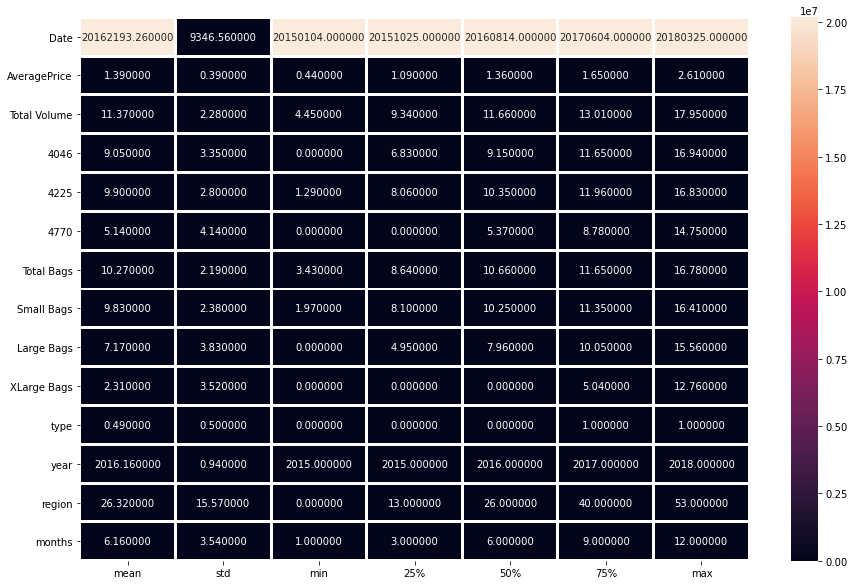

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")

plt.show()





AveragePrice:No deviation between mean and median,max and 75% has difference and also the data has disparity with mean and STD,              which shows data is not normally distributed
Total Volume: we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
4046:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
4225:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
4770:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
Total Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
Small Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations                than normal
Large Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations                than normal
XLarge Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
year:No deviation between mean and median,max and 75% has negligable difference

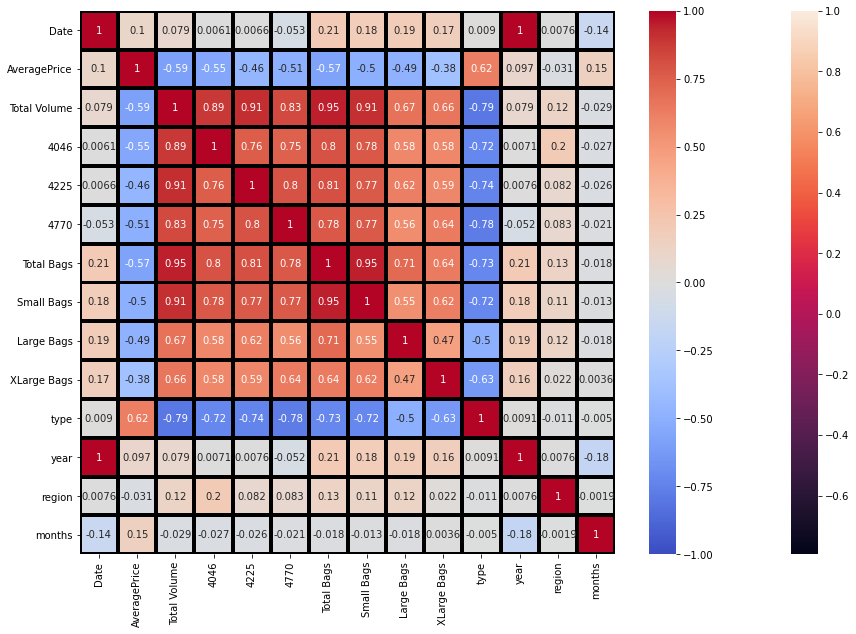

In [117]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

Total number of avocados sold with PLU 4225 and  PLU 4046 has highest correlation of 975 and 985 respectively
small bags sold are correlated 97% with total number of volume sold out total bags sold is 96% of totalvolume

xl bags are comparitvely less sold i,e., 75% and number of avocados sold with PLU 4770 is also less as it shows 875 correlation 

average price and year has no correlation


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210B3458220>,
      dtype=object)

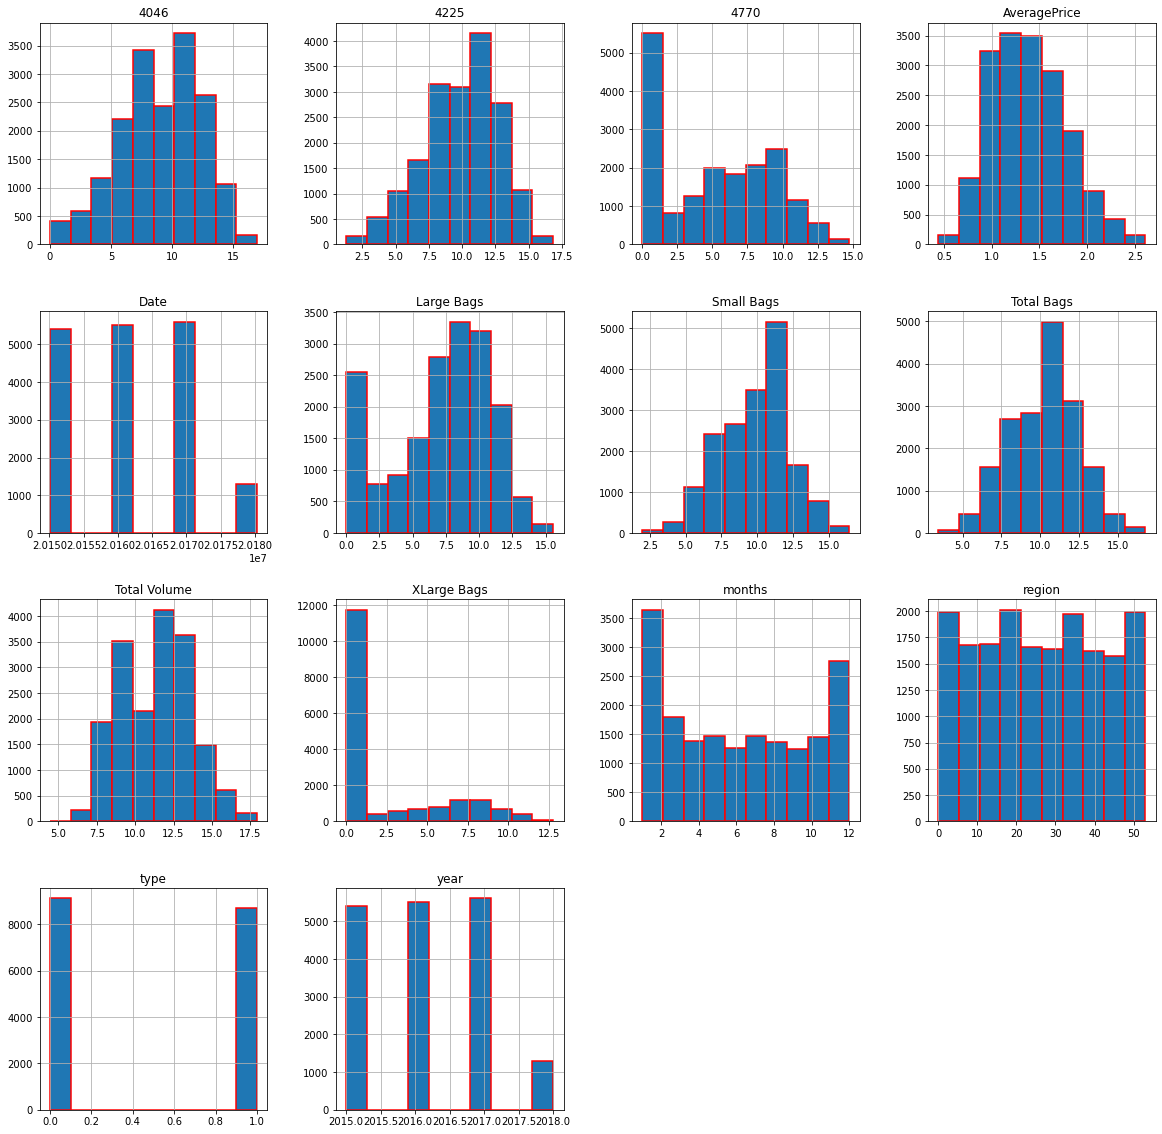

In [118]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

From the above chart we can see the data is not normally distributed except average price data,hence we will check the level of skewness with each attribute and remove the outliers to make further analysis

CHECKING FOR OUTLIERS 

checking outiers on sub categories

Text(0, 0.5, 'Total Volume')

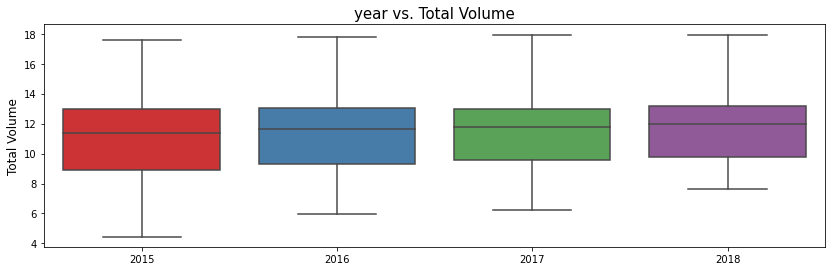

In [119]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='year', y='Total Volume', data=df, palette="Set1")
a.set_title("year vs. Total Volume", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

Text(0, 0.5, 'Total Volume')

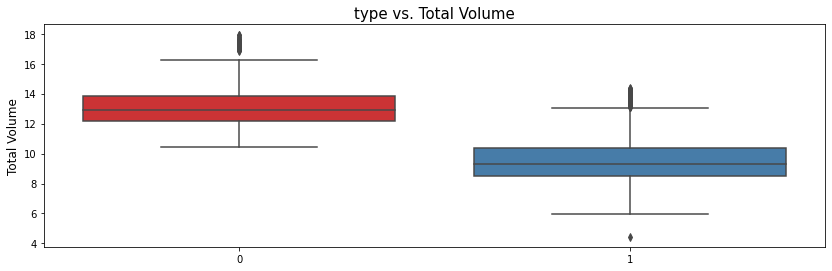

In [120]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='type', y='Total Volume', data=df, palette="Set1")
a.set_title("type vs. Total Volume", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

In [121]:
df.skew()

Date            0.184073
AveragePrice    0.413916
Total Volume    0.062751
4046           -0.356673
4225           -0.413289
4770            0.063880
Total Bags     -0.117007
Small Bags     -0.262736
Large Bags     -0.567968
XLarge Bags     1.142228
type            0.045547
year            0.209500
region          0.021042
months          0.116169
dtype: float64




We can observe from above data
-->high skewness in XLarge bags with 13.14 and number of avocados with PLU 4770 with 10.16
-->total bags with 9.75,Large bags with 9.79, small bags with 9.54, total sales volume with 9
-->number of avocados with PLU 4046 with 8.64 and number of avocados with PLU 4225 with 8.94

Therfore we can conclude from histogram, boxplot of outliers and skewness data that all the attributes are having outliers other than AveragePrice


In [122]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

From the above figure we can see the outliers present in sales volume of all years

conventional type of avacados has more outliers than organic type of avacados

checking outliers on all attributes 

Date                AxesSubplot(0.125,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4225               AxesSubplot(0.125,0.518913;0.168478x0.16413)
4770            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Large Bags         AxesSubplot(0.125,0.321957;0.168478x0.16413)
XLarge Bags     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
type            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
year            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
region                AxesSubplot(0.125,0.125;0.168478x0.16413)
months             AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

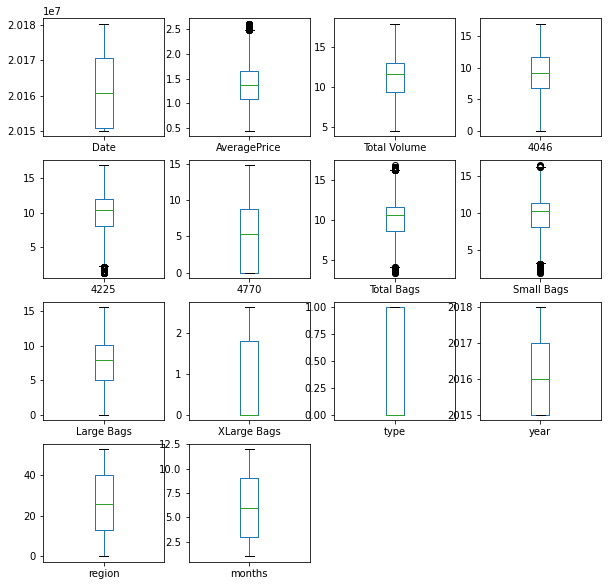

In [123]:
df.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

We have got the same results as histogram plots,all columns except average price and year we find outliers present 
lets observe the level of skewness in each attribute

DATA CLEANSING

In [124]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type']
df['region']=le.fit_transform(df['region'])
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17834, dtype: int64

In [125]:
import datetime

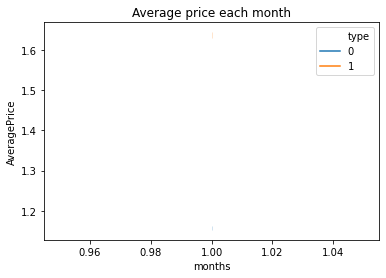

In [126]:
df['Date']=pd.to_datetime(df['Date'])
df["months"]=df['Date'].map(lambda x : x.month)
plt.title('Average price each month')
sns.lineplot(x='months',y='AveragePrice',data=df,hue='type')

the above data shows the prices are not even in all the months, which means prices fluctuate according to seasonal changes

In [129]:
da=pd.to_datetime(df['Date'],errors='coerce')
df['Date']=da.dt.strftime("%Y%m%d").astype(int)

In [130]:
df.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
months            int64
dtype: object

In [137]:
df.shape

(17834, 14)

REMOVING OUTLIERS

In [133]:

from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)

[[       nan 0.16022288 0.13249789 ... 1.22957126 1.69078431        nan]
 [       nan 0.10846984 0.20162572 ... 1.22957126 1.69078431        nan]
 [       nan 1.19528376 0.13526087 ... 1.22957126 1.69078431        nan]
 ...
 [       nan 1.23710929 0.8086277  ... 1.96090944 1.71404749        nan]
 [       nan 1.39236842 0.73704662 ... 1.96090944 1.71404749        nan]
 [       nan 0.59019625 0.70356744 ... 1.96090944 1.71404749        nan]]


In [138]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 17833, 17833, 17833], dtype=int64), array([ 1,  2,  3, ..., 10, 11, 12], dtype=int64))
(17834, 14)


In [139]:
df_new=df[(z<3).all(axis=1)]

In [140]:
print(df.shape)
print(df_new.shape)
df=df_new
print('shape after removing outliers',df.shape)

(17834, 14)
(0, 14)
shape after removing outliers (0, 14)


In [141]:

df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'months'],
      dtype='object')

In [35]:

percentage_loss=((18249-17840 )/18249)*100
print(percentage_loss)

2.2412186969148995


#### if we opt to remove outliers through zscore we will be loosing 2.24% of data

In [36]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Date            19579.000000
AveragePrice        0.560000
Total Volume        3.670237
4046                4.823705
4225                3.908651
4770                8.783225
Total Bags          3.005780
Small Bags          3.251940
Large Bags          5.098820
XLarge Bags         5.036547
type                1.000000
year                2.000000
region             27.000000
months              6.000000
dtype: float64


In [37]:
new_df2=df[~((df<Q1-(1.5*IQR))|(df>(Q3+(1.5*IQR)))).any(axis=1)]
new_df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,months
0,20151227,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12
1,20151220,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12
2,20151213,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12
3,20151206,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12
4,20151129,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,20180204,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2
18245,20180128,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1
18246,20180121,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1
18247,20180114,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1


In [38]:
percentage_loss=((18249-11538  )/18249)*100
print(percentage_loss)

36.774617787276014


the above quartile method we will be loosing 36.77% of data which is too high hence we choose zscoremethod

In [39]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'months'],
      dtype='object')

In [87]:
from sklearn.model_selection import train_test_split
x = df_new.iloc[:,2:13]
y = df_new['AveragePrice']

In [88]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.13249789, -0.62742619,  0.35800125, ..., -0.97748783,
        -1.22957126, -1.69078431],
       [-0.20162572, -0.75550098,  0.28688711, ..., -0.97748783,
        -1.22957126, -1.69078431],
       [ 0.13526087, -0.70658843,  0.6067806 , ..., -0.97748783,
        -1.22957126, -1.69078431],
       ...,
       [-0.8086277 , -0.58588682, -0.75103402, ...,  1.02303064,
         1.96090944,  1.71404749],
       [-0.73704662, -0.51197383, -0.681276  , ...,  1.02303064,
         1.96090944,  1.71404749],
       [-0.70356744, -0.32153998, -0.76541289, ...,  1.02303064,
         1.96090944,  1.71404749]])

In [89]:
y=le.fit_transform(y)

In [90]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Classification

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [93]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.022427810485001403
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00     

In [94]:
gnb=GaussianNB()

In [ ]:
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [ ]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [ ]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.03336136809643959
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00      

In [ ]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,preddt))




0.04513596860106532


In [111]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
y_pred_prob




array([0., 0., 0., ..., 0., 0., 0.])

ValueError: multiclass format is not supported

NameError: name 'fpr' is not defined

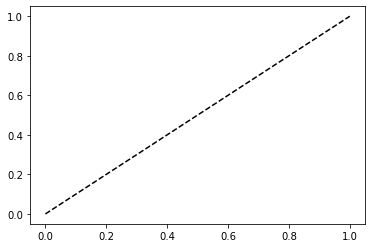

In [113]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False result heart disease')
plt.ylabel('True result heart disease')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

REGRESSOR MODEL BUILDING

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import linear_model

In [53]:
max_r_score=0
for r_state in range (30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20) 
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to:-",final_r_state,"is",max_r_score)


max r2 score corresponding to:- 81 is 0.5637829007177882


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=0.20) 


In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.17130094011665808

LINEAR REGRESSION

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=0.20) 
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print ("r2 score is ",r2_score,(x_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  <function r2_score at 0x00000210ADC74AF0> (array([[-1.34366435, -0.39059947, -1.54226769, ...,  1.02303064,
        -0.10422044, -0.40001389],
       [ 0.34242636,  0.34837508,  0.24206969, ..., -0.97748783,
        -1.27486262, -1.24530269],
       [-0.17611796,  0.26302649, -0.78611128, ..., -0.97748783,
        -1.27486262, -1.50682143],
       ...,
       [-1.98167416, -1.41111424, -1.16984869, ...,  1.02303064,
        -0.10422044, -0.78915657],
       [-1.15067119, -0.35870072, -1.56871409, ...,  1.02303064,
        -0.10422044,  0.30733867],
       [-1.15626982, -0.43594407, -1.47499234, ...,  1.02303064,
        -0.10422044,  0.30733867]]), array([124.04675719,  63.48683308,  59.08407219, ..., 151.38947976,
       113.76922217, 115.62986779]))
RMSE is : 25.78404049008242


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

In [ ]:
print ("at cv :-",5)
print("at cross validation score is :-",22.6594)
print("r2_score:-",52.9190)

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales of Avacados",fontsize=14)
plt.ylabel("Predicted Sales of Avacados",fontsize=14)
plt.title("LassoRegression",fontsize=18)
plt.show()

In [ ]:
#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
dt=DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_decision))
print('MeanSquaredError:',mean_squared_error(y_test,pred_decision))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_decision)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales of Avacados",fontsize=14)
plt.ylabel("Predicted Sales of Avacados",fontsize=14)
plt.title("DecisionTreeRegressor",fontsize=18)
plt.show()

In [ ]:
#GradientBoostingRegressor

In [71]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 200}


In [70]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_gbr=gbr.predict(x_test)

gbrs=r2_score(y_test,pred_gbr)
print('R2 SCORE',gbrs*100)

gbscore=cross_val_score(gbr,x,y,cv=5)
gbrc=gbscore.mean()
print('CrossValScore:',gbrc*100)

NameError: name 'GradientBoostingRegressor' is not defined

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_gbr))
print('MeanSquaredError:',mean_squared_error(y_test,pred_gbr))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_gbr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales of Avacados",fontsize=14)
plt.ylabel("Predicted sales of Avacados",fontsize=14)
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [ ]:
#AdaBoostRegressor

In [48]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
parameters={'base_estimator':[None], 'learning_rate':[1.0,2.0], 'loss':['linear','square','exponential'],'n_estimators':[50,100],'random_state':[50]}
ADB=AdaBoostRegressor()
clf=GridSearchCV(ADB,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'base_estimator': None, 'learning_rate': 2.0, 'loss': 'square', 'n_estimators': 100, 'random_state': 50}


In [59]:
ADB=AdaBoostRegressor(base_estimator=None,learning_rate=2.0,loss='square',n_estimators=100,random_state=50)
ADB.fit(x_train,y_train)
ADB.score(x_train,y_train)
pred_ADB=ADB.predict(x_test)

ADBS=r2_score(y_test,pred_ADB)
print('R2 Score:',ADBS*100)

ADBSscore=cross_val_score(ADB,x,y,cv=5)
ADBC=ADBSscore.mean()
print('cross val score:',ADBC*100)

R2 Score: 52.972530883030736
cross val score: -10.026454042877688


In [62]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ADB))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ADB))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ADB)))

Error:-
MeanAbsoluteError: 21.860112420442036
MeanSquaredError: 716.7222226748387
RootMeanSquareError: 26.771668283370737


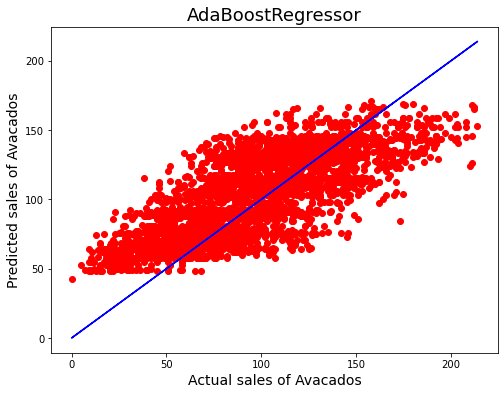

In [64]:
plt.figure(figsize=(8,6))

plt.scatter(x=y_test,y=pred_ADB,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales of Avacados",fontsize=14)
plt.ylabel("Predicted sales of Avacados",fontsize=14)
plt.title("AdaBoostRegressor",fontsize=18)
plt.show()


In [65]:
#SGD Regressor

In [66]:
from sklearn.linear_model import SGDRegressor
parameters={'alpha':[0.0001,0.001,0.01,0.1],'epsilon':[0.01,0.1],'penalty':['elasticnet'],'max_iter':[1000],'tol':[1e-3]}
SGD=SGDRegressor()
clf=GridSearchCV(SGD,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'alpha': 0.0001, 'epsilon': 0.01, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}


In [67]:
SGD=SGDRegressor(alpha=0.0001,epsilon=0.01,max_iter=1000,penalty='elasticnet',tol=0.001)
SGD.fit(x_train,y_train)
pred_SGD=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

Accuracy=56.37829007177883,Cross_Val_score=53.33304497537623and difference=3.0452450964025957


In [68]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_SGD))
print('MeanSquaredError:',mean_squared_error(y_test,pred_SGD))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

Error:-
MeanAbsoluteError: 20.499232809192343
MeanSquaredError: 666.0200126767417
RootMeanSquareError: 25.80736353595116


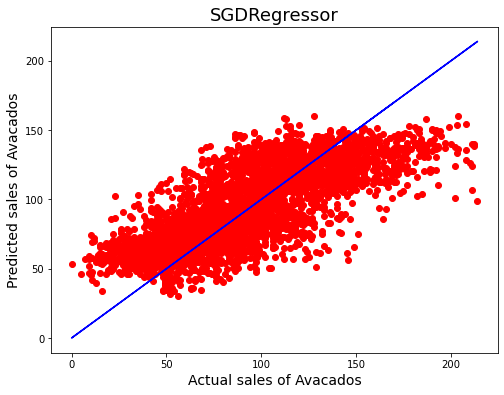

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_SGD,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales of Avacados",fontsize=14)
plt.ylabel("Predicted sales of Avacados",fontsize=14)
plt.title("SGDRegressor",fontsize=18)
plt.show()

In [74]:
parameters={"alpha":[0.0001,0.001,0.01,0.1,1,10],"epsilon":[0.01,0.1],'max_iter':[1000],'tol':[1e-3]}

from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

Final accuracy: 56.23073385958119


<bound method BaseSearchCV.fit of GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [50, 100, 200]})>

THE BEST MODEL IS SGD
the maximum accuracy inthis model is not increasing above 56.23%,we can derive more accuracy with higher data

SERIALIZTION 

In [143]:
import pickle
filename='inhouse_avacadoproject.pkl'

In [144]:
pickle.dump(SGD,open(filename,'wb'))

CONCLUSION

In [145]:
import numpy as np
a=np.array(y_test)
predicted=np.array(SGD.predict(x_test))

In [148]:
df_final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [149]:
df_final

,original,predicted
0,168,137.847442
1,91,135.598292
2,93,70.252743
3,53,75.471433
4,71,76.558179
...,...,...
3562,114,119.469715
3563,136,91.901578
3564,95,83.565612
3565,105,140.037953


From the above table the model is predicted the values with 50-56% accuracy